# Sine wave example

Copyright 2024 Michael George (AKA Logiqx).

This file is distributed under the terms of the GNU General Public License.

It is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

It is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this example. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
FIG_WIDTH = 10
FIG_HEIGHT = 5

IMG_FOLDER = 'img'

In [3]:
data = np.array([
    0.00218231, 0.1665711, 0.41216404, -0.40287319, -0.22606227, 0.37655031
    , 0.04845504, 0.16123934, 0.61495667, 0.22540458, -0.01782209, 0.33503161
    , 0.17444053, 0.44044592, 0.03790571, 0.00890335, 0.38477521, 0.42814964
    , -0.08026259, -0.209579, 0.41249965, 0.34517665, 0.56154386, 0.46867116
    , 0.24580305, 0.44108385, 0.43212904, 0.4368419, 0.59986233, 0.69659464
    , 0.4230877, 0.27461004, 0.39671146, 0.67383719, 0.94966646, 0.65970319
    , 0.19775799, 0.83525293, 0.88822246, 0.27798892, 0.22344739, 0.59092345
    , 0.66186512, 0.84105007, 0.87005403, 0.63667532, 0.74074875, 0.54548938
    , 0.32280975, 0.85043558, 0.83342997, 0.91868816, 0.5805292, 0.85470564
    , 0.95727532, 0.3037694, 0.42016351, 1.17078032, 1.00933528, 0.82542947
    , 0.92801147, 1.04622981, 0.48376928, 0.67231388, 0.21728743, 0.49319891
    , 0.75342431, 1.13483923, 1.20135253, 1.21846425, 0.83584974, 0.88742763
    , 0.90994301, 0.99673311, 1.12838394, 0.70617015, 1.46773251, 0.55431247
    , 1.04661873, 0.95621855, 1.13052226, 0.95186216, 1.25007822, 0.80953904
    , 1.03864885, 0.60060506, 1.17512802, 0.95295398, 1.21581545, 0.86557631
    , 0.95025857, 0.89910033, 0.95808254, 0.99973513, 1.10705189, 0.83927786
    , 1.03940528, 1.03998444, 0.95944098, 0.71462418, 1.26171776, 0.71170001
    , 0.78637252, 1.05290204, 1.06987798, 1.21832822, 0.79851068, 0.7993067
    , 1.12072184, 0.88815997, 1.02960055, 0.71563096, 0.9556451, 0.97099985
    , 0.64017202, 0.73871666, 1.1172759, 0.84955639, 1.19888982, 0.68729847
    , 0.84011962, 0.77214772, 0.6384448, 0.9067249, 0.58447657, 0.86814158
    , 0.55373041, 0.40529698, 0.7338324, 0.33888704, 0.62520344, 0.58829556
    , 0.70443915, 1.00150397, 0.43636594, 0.42728093, 0.71311823, 0.21665031
    , 0.58774826, 0.21681237, 0.79794355, 1.03065835, 0.39971003, 0.94318425
    , 0.87393911, 0.44540573, 0.57011443, 0.59146616, 0.66589911, 0.49968588
    , 0.55638893, 0.47230608, 0.4043144, 0.52878243, 0.7699333, 0.3243387
    , 0.2099612, 0.56735025, 0.5444571, 0.4360914, 0.08465557, 0.34273177
    , 0.44514346, 0.45077631, -0.2154379, 0.1937706, -0.08093022, 0.36814519
    , 0.12974958, -0.15981735, 0.15646715, 0.14146461, 0.20864158, 0.079204
    , 0.07479226, 0.12170317, 0.24753681, 0.25974189, 0.18918881, 0.40589434
])

min data -0.4
mean data 0.61
max data 1.47


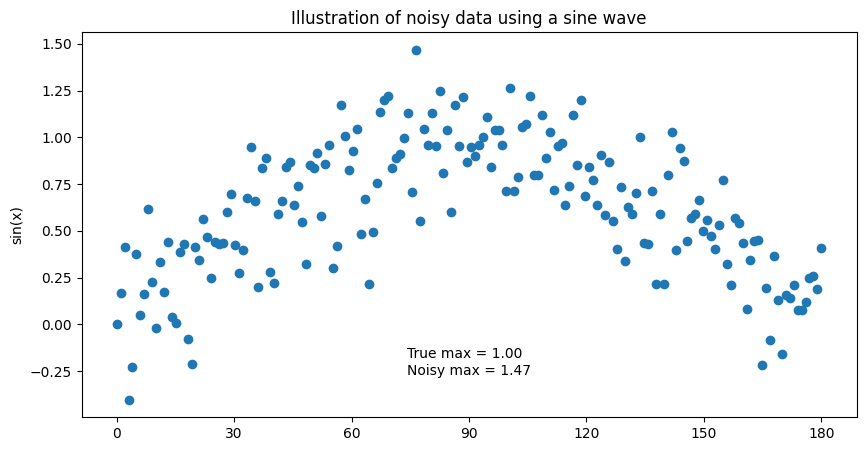

min data -0.4
mean data 0.61
max data 1.47

min savgol 0.02
mean savgol 0.61
max savgol 1.0


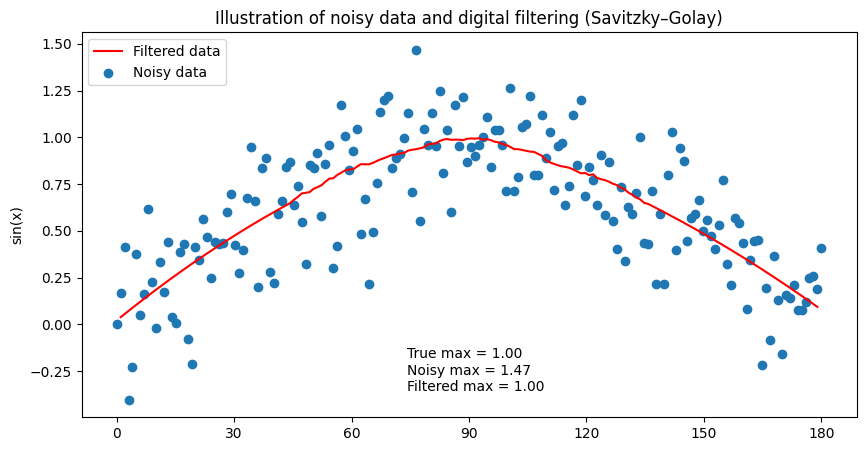


All done!


In [4]:
def main(name='2-sine', window_length=1, polyorder=0, hide=0):
    '''Create example chart'''
    
    xLimit = 180
    
    x = np.linspace(0, np.pi, xLimit)
    xhat = x * (180 / np.pi)
    
    # Random noise - plus or minus 0.2
    #y = np.sin(x) + (np.random.random(xLimit) * 0.4 - .2)
    
    # Gaussian noise - stddev 0.2
    #y = np.sin(x) + np.random.normal(0, .2, len(x))
    
    # Pre-generated Gaussian noise - stddev 0.2
    y = data
    
    print('min data', np.round(np.min(y), 2))
    print('mean data', np.round(np.mean(y), 2))
    print('max data', np.round(np.max(y), 2))

    if window_length > 1:
        yhat = savgol_filter(y, window_length, polyorder) # window size 51, polynomial order 3
        
        print()
        print('min savgol', np.round(np.min(yhat), 2))
        print('mean savgol', np.round(np.mean(yhat), 2))
        print('max savgol', np.round(np.max(yhat), 2))
    else:
        yhat = np.sin(x)
    
    fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
    
    if window_length > 1:
        plt.plot(xhat[hide:-hide], yhat[hide:-hide], label='Filtered data', color='red')
    plt.scatter(xhat, y, label ='Noisy data')

    title = 'Illustration of noisy data'
    if window_length > 1:
        title += ' and digital filtering (Savitzky–Golay)'
    else:
        title += ' using a sine wave'
    plt.title(title)

    plt.xticks(np.arange(0, 180 + 1, 30))
    plt.ylabel("sin(x)")

    if window_length > 1:
        ax = fig.get_axes()[0]
        ax.legend(loc = 'upper left')
  
    comment = 'True max = 1.00\nNoisy max = {:.2f}'.format(np.max(y))
    if window_length > 1:
        comment += '\nFiltered max = {:.2f}'.format(np.max(yhat))
    fig.text(0.45, 0.25, comment, verticalalignment='top')

    plt.show()

    fname = os.path.join(IMG_FOLDER, name + '.png')
    fig.savefig(fname)


if __name__ == '__main__':
    projdir = os.path.realpath(os.path.join(sys.path[0], "..", ".."))

    main(name='2-sine')
    main(name='2-sine-savgol', window_length=90, polyorder=2, hide=1)
    
    print(os.linesep + 'All done!')